# Web Scraping**

**Task 1: Data Scraping and Preparation**

*Step 1: Scrape your competitor’s data*. Use Python to scrape data for the top 50 solar flares shown in SpaceWeatherLive.com.

In [504]:
# import all the needed libraries
import pandas as pd
import numpy as np
import requests
import html5lib
from bs4 import BeautifulSoup

In [505]:
web_url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html'

# headers contain protocol-specific information
r = requests.get(web_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}) # get (as in HTTP GET) the URL
soup = BeautifulSoup(r.content, 'html5lib') # read and parse the data
print(soup.prettify()) # to view the content and find the appropriate table

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Top 50 solar flares | Solar activity | SpaceWeatherLive.com
  </title>
  <meta charset="utf-8"/>
  <meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"/>
  <meta content="On this page you will find an overview of the strongest solar flares since June 1996 together with links to more information in our archive and a v..." name="description"/>
  <meta content="SpaceWeatherLive, Live, Aurora, Auroral activity, Aurora Australis, Aurora Borealis, northern lights, Solar wind, Kp-index, Space Weather, Space Weather Updates, Aurora forecast, Space Weather Alerts, Solar activity, Solar flares, Sunspots, Aurora alert, Auroral activity, The Sun, SDO, STEREO, EPAM, DSCOVR" name="keywords"/>
  <!-- Facebook meta -->
  <meta content="https://spaceweatherlive.com/en/solar-activity/top-50-solar-flares.html" property="og:url"/>
  <meta content="article" property="og:type"/>
  <meta content="Top 5

In [506]:
# use find() to save the appropriate infomation from the web
title = soup.find("title") # scrape all the infomation under h1 tag
title

<title>Top 50 solar flares | Solar activity | SpaceWeatherLive.com</title>

In [507]:
# save the aforementioned table as a variable
table = soup.find('table')
table

<table class="table table-striped"><thead><tr><th></th><th></th><th></th><th>Region</th><th>Start</th><th>Maximum</th><th>End</th><th></th></tr></thead><tbody><tr><td>1</td><td><span class="flare_small Xclass">X28+</span></td><td>2003/11/04</td><td><a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/10486.html">0486</a></td><td>19:29</td><td>19:53</td><td>20:06</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-fancybox="" href="/images/Archief/2003/Flares/200311041953X28.0.mp4"><i aria-hidden="true" class="far fa-play-circle"></i> Movie</a><a class="btn btn-xs btn-outline-dark" href="/en/archive/2003/11/04/xray.html">View archive</a></div></td></tr><tr><td>2</td><td><span class="flare_small Xclass">X20+</span></td><td>2001/04/02</td><td><a class="btn btn-SWL RegionBGD" href="/en/solar-activity/region/9393.html">9393</a></td><td>21:32</td><td>21:51</td><td>22:03</td><td><div class="btn-group"><a class="btn btn-xs btn-outline-dark" data-fancybox="" h

In [508]:
# read the table from the html
df = pd.read_html(r.content, flavor = 'bs4') 
df = df[0]
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Region,Start,Maximum,End,Unnamed: 7
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive


In [509]:
df.columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time','movie']
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive


In [510]:
# remove unwanted signs
df['x_classification'] = df['x_classification'].map(lambda x: x.lstrip('+-').rstrip('+-')) 
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28,2003/11/04,486,19:29,19:53,20:06,MovieView archive
1,2,X20,2001/04/02,9393,21:32,21:51,22:03,MovieView archive
2,3,X17.2,2003/10/28,486,09:51,11:10,11:24,MovieView archive
3,4,X17,2005/09/07,808,17:17,17:40,18:03,MovieView archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,MovieView archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,MovieView archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,MovieView archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,MovieView archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,MovieView archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,MovieView archive



*Step 2: Tidy the top 50 solar flare data*. The next step is to make sure that this table is usable using pandas.

In [511]:
df = df.drop(['movie'], axis = 1)

In [512]:
from datetime import datetime

for index, row in df.iterrows():
   df.at[index, 'start_time'] = datetime.strptime(row['date'] + ' ' + row['start_time'], '%Y/%m/%d %H:%M')
   df.at[index, 'maximum_time'] = datetime.strptime(row['date'] + ' ' + row['maximum_time'], '%Y/%m/%d %H:%M')
   df.at[index, 'end_time'] = datetime.strptime(row['date'] + ' ' + row['end_time'], '%Y/%m/%d %H:%M')
   
df.drop('date', axis=1, inplace=True)    
new = {'start_time':'start_datetime', 'maximum_time':'max_datetime', 'end_time':'end_datetime'}
df.columns = ['rank', 'x_classification', 'region', 'start_datetime', 'maximum_datetime', 'end_datetime']

# replace missing cells with (NaN) in region column
df = df.replace(to_replace= '-', value= np.nan)
df


,rank,x_classification,region,start_datetime,maximum_datetime,end_datetime
0,1,X28,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


*Step 3: Scrape the NASA data*. You now scrape the data in Wind/WAVES type II
bursts and CMEs to get additional data about these solar flares. The format of this table is described at The Wind/WAVES type II burst catalog: A brief description.

In [513]:
nasa_url = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'

r_nasa = requests.get(nasa_url, headers={"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36"}) # Extract NASA HTML page
nasa_data = BeautifulSoup(r_nasa.content, 'html5lib')
print(nasa_data.prettify()) # all the information is in <pre> tag
nasa_txt = nasa_data.find('pre').text # all the information is in single string

data = []
for word in nasa_txt.split('\n'):
    data.append(word)

<html>
 <head>
 </head>
 <body>
  <h2>
   Wind/WAVES type II bursts and CMEs
  </h2>
  <a href="waves_type2_description.htm">
   A Brief Description
  </a>
  <br/>
  <h4 style="padding-bottom=0px">
   Relevant Publication:
  </h4>
  Gopalswamy, N., Mäkelä, P., Yashiro, S. (2019), Sun and Geosphere, 14, 111,
  <a href="https://doi.org/10.31401/SunGeo.2019.02.03">
   DOI:10.31401/SunGeo.2019.02.03
  </a>
  <br/>
  <br/>
  <pre>NOTE: List includes DH type II bursts observed by Wind spacecraft, 
but after STEREO launch on Oct 2006 the start and end times and 
frequencies of bursts are determined using both Wind and STEREO 
observations

                DH Type II                       Flare                     CME                   
----------------------------------------   -----------------   --------------------------   Plots
Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        
(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (1

In [514]:
data

['NOTE: List includes DH type II bursts observed by Wind spacecraft, ',
 'but after STEREO launch on Oct 2006 the start and end times and ',
 'frequencies of bursts are determined using both Wind and STEREO ',
 'observations',
 '',
 '=================================================================================================',
 '                DH Type II                       Flare                     CME                   ',
 '----------------------------------------   -----------------   --------------------------   Plots',
 'Start            End          Frequency     Loc   NOAA  Imp    Date  Time CPA  Width  Spd        ',
 '(1)        (2)   (3)   (4)   (5)    (6)     (7)    (8)  (9)    (10)  (11) (12)  (13) (14)   (15) ',
 '=================================================================================================',
 '1997/04/01 14:00 04/01 14:15  8000  4000   S25E16  8026 M1.3   04/01 15:18   74   79  312   PHTX',
 '1997/04/07 14:30 04/07 17:30 11000  1000   S28E19  80

In [515]:
# the first 11 values are useless, remove them, and create a dataframe for the rest of the information
len(data)

535

In [516]:
data = data[11:-3]
len(data)

521

In [517]:
nasa_df = pd.DataFrame(data, columns=['dummy'])    

In [518]:
nasa_df

,dummy
0,1997/04/01 14:00 04/01 14:15 8000 4000 S25...
1,1997/04/07 14:30 04/07 17:30 11000 1000 S28...
2,1997/05/12 05:15 05/14 16:00 12000 80 N21...
3,1997/05/21 20:20 05/21 22:00 5000 500 N05...
4,1997/09/23 21:53 09/23 22:16 6000 2000 S29...
...,...
516,2017/09/12 07:38 09/12 07:43 16000 13000 N08...
517,2017/09/17 11:45 09/17 12:35 16000 900 S08E...
518,2017/10/18 05:48 10/18 12:40 16000 400 S06E...
519,2019/05/03 23:52 05/04 00:16 13000 2300 N12...


In [519]:
nasa_df = nasa_df['dummy'].str.split(" +", expand = True) # split by space
nasa_df = nasa_df.reset_index(drop=True)
nasa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       521 non-null    object
 1   1       521 non-null    object
 2   2       521 non-null    object
 3   3       521 non-null    object
 4   4       521 non-null    object
 5   5       521 non-null    object
 6   6       521 non-null    object
 7   7       521 non-null    object
 8   8       521 non-null    object
 9   9       521 non-null    object
 10  10      521 non-null    object
 11  11      521 non-null    object
 12  12      521 non-null    object
 13  13      521 non-null    object
 14  14      521 non-null    object
 15  15      48 non-null     object
 16  16      12 non-null     object
 17  17      7 non-null      object
 18  18      5 non-null      object
 19  19      5 non-null      object
 20  20      3 non-null      object
 21  21      1 non-null      object
 22  22      1 non-null      ob

In [520]:
nasa_df = nasa_df.drop(nasa_df.columns[14:24], axis=1) # seen from .info(), the last 7 columns are useless 
nasa_df.columns = ['Start_Date', 'Start_Time', 'End_Date', 'End_Time', 'Start_Frequency', 'End_Frequency', 'Flare_Location', 'Flare_Region', 'Flare_Classification', 'Cme_Date', 'Cme_Time', 'Cme_Angle', 'Cme_Width', 'Cme_Speed']
nasa_df

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Date,Cme_Time,Cme_Angle,Cme_Width,Cme_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252
517,2017/09/17,11:45,09/17,12:35,16000,900,S08E170,-----,----,09/17,12:00,Halo,360,1385
518,2017/10/18,05:48,10/18,12:40,16000,400,S06E123,-----,----,10/18,08:00,85,146,1001
519,2019/05/03,23:52,05/04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692


In [521]:
nasa_df['Flare_Region'].replace('-----', np.nan)
nasa_df['Flare_Classification'].replace('----', np.nan)

0      M1.3
1      C6.8
2      C1.3
3      M1.3
4      C1.4
       ... 
516    C3.0
517     NaN
518     NaN
519    C1.0
520    M4.4
Name: Flare_Classification, Length: 521, dtype: object

In [522]:
nasa_df.head()

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Date,Cme_Time,Cme_Angle,Cme_Width,Cme_Speed
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712


*Step 4: Tidy the NASA table*. We next tidy up the NASA table. We will code missing observations properly, recode columns that correspond to more than one piece of information, and treat dates and times appropriately.


In [523]:
special_char = ['FILA', 'DSF', '????', '----', '-----', '---', "--/--", "--:--"] # the Wind/WAVES type II burst catalog: A brief description
for index, row in nasa_df.iterrows():
  nasa_df = nasa_df.replace(special_char, np.nan)

nasa_df['Cme_Angle'].replace('Halo', np.nan)


0       74
1      NaN
2      NaN
3      263
4      133
      ... 
516    124
517    NaN
518     85
519     90
520    NaN
Name: Cme_Angle, Length: 521, dtype: object

In [524]:
year = pd.DatetimeIndex(nasa_df['Start_Date']).year
year 

Int64Index([1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2019, 2020],
           dtype='int64', name='Start_Date', length=521)

In [525]:
nasa_df['End_Date'] = pd.to_datetime(year.astype(str) + '/' +nasa_df['End_Date'].astype(str), format='%Y/%m/%d')
nasa_df['Start_Date'] = pd.to_datetime(nasa_df['Start_Date'].astype(str) + " " + nasa_df['Start_Time'].astype(str), format='%Y/%m/%d %H:%M')
nasa_df

,Start_Date,Start_Time,End_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Date,Cme_Time,Cme_Angle,Cme_Width,Cme_Speed
0,1997-04-01 14:00:00,14:00,1997-04-01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312
1,1997-04-07 14:30:00,14:30,1997-04-07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878
2,1997-05-12 05:15:00,05:15,1997-05-14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464
3,1997-05-21 20:20:00,20:20,1997-05-21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296
4,1997-09-23 21:53:00,21:53,1997-09-23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017-09-12 07:38:00,07:38,2017-09-12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252
517,2017-09-17 11:45:00,11:45,2017-09-17,12:35,16000,900,S08E170,NaN,NaN,09/17,12:00,Halo,360,1385
518,2017-10-18 05:48:00,05:48,2017-10-18,12:40,16000,400,S06E123,NaN,NaN,10/18,08:00,85,146,1001
519,2019-05-03 23:52:00,23:52,2019-05-04,00:16,13000,2300,N12E82,12740,C1.0,05/03,23:24,90,113,692


In [526]:
nasa_df['Cme_Time'] = pd.to_datetime(nasa_df['Cme_Time'].astype(str), format='%H:%M')

In [527]:
nasa_df['End_Time'] = nasa_df['End_Time'].replace('24:00', '00:00')  

In [528]:
nasa_df['End_Time'] = pd.to_datetime(nasa_df['End_Time'].astype(str), format='%H:%M')  

In [529]:
nasa_df = nasa_df.drop(['Start_Time'], axis = 1)
nasa_df = nasa_df.drop(['End_Date'], axis = 1)
nasa_df = nasa_df.drop(['Cme_Date'], axis = 1)

nasa_df.rename(columns={"Start_Date":"Start_DateTime"})
nasa_df.rename(columns={"End_Time":"End_DateTime"})
nasa_df.rename(columns={"Cme_Time":"Cme_DateTime"})

nasa_df.head()

,Start_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Time,Cme_Angle,Cme_Width,Cme_Speed
0,1997-04-01 14:00:00,1900-01-01 14:15:00,8000,4000,S25E16,8026,M1.3,1900-01-01 15:18:00,74,79,312
1,1997-04-07 14:30:00,1900-01-01 17:30:00,11000,1000,S28E19,8027,C6.8,1900-01-01 14:27:00,Halo,360,878
2,1997-05-12 05:15:00,1900-01-01 16:00:00,12000,80,N21W08,8038,C1.3,1900-01-01 05:30:00,Halo,360,464
3,1997-05-21 20:20:00,1900-01-01 22:00:00,5000,500,N05W12,8040,M1.3,1900-01-01 21:00:00,263,165,296
4,1997-09-23 21:53:00,1900-01-01 22:16:00,6000,2000,S29E25,8088,C1.4,1900-01-01 22:02:00,133,155,712


In [530]:
nasa_df['is_halo'] = [ value == 'Halo' for value in nasa_df['Cme_Angle']] 
nasa_df['width_lower_bound'] = [(not pd.isnull(value) and '>' in value) for value in nasa_df['Cme_Width']]
nasa_df['Cme_Width'] = [value.replace('>','') if (not pd.isnull(value)) else value for value in nasa_df['Cme_Width']]
nasa_df['Cme_Width'] = [value.replace('h','') if (not pd.isnull(value)) else value for value in nasa_df['Cme_Width']]
nasa_df['Cme_Width'] = [float(field) for field in nasa_df['Cme_Width']]
nasa_df = nasa_df.drop(['Cme_Width'], axis = 1)

nasa_df

,Start_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Time,Cme_Angle,Cme_Speed,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1900-01-01 14:15:00,8000,4000,S25E16,8026,M1.3,1900-01-01 15:18:00,74,312,False,False
1,1997-04-07 14:30:00,1900-01-01 17:30:00,11000,1000,S28E19,8027,C6.8,1900-01-01 14:27:00,Halo,878,True,False
2,1997-05-12 05:15:00,1900-01-01 16:00:00,12000,80,N21W08,8038,C1.3,1900-01-01 05:30:00,Halo,464,True,False
3,1997-05-21 20:20:00,1900-01-01 22:00:00,5000,500,N05W12,8040,M1.3,1900-01-01 21:00:00,263,296,False,False
4,1997-09-23 21:53:00,1900-01-01 22:16:00,6000,2000,S29E25,8088,C1.4,1900-01-01 22:02:00,133,712,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
516,2017-09-12 07:38:00,1900-01-01 07:43:00,16000,13000,N08E48,12680,C3.0,1900-01-01 08:03:00,124,252,False,False
517,2017-09-17 11:45:00,1900-01-01 12:35:00,16000,900,S08E170,NaN,NaN,1900-01-01 12:00:00,Halo,1385,True,False
518,2017-10-18 05:48:00,1900-01-01 12:40:00,16000,400,S06E123,NaN,NaN,1900-01-01 08:00:00,85,1001,False,False
519,2019-05-03 23:52:00,1900-01-01 00:16:00,13000,2300,N12E82,12740,C1.0,1900-01-01 23:24:00,90,692,False,False


**Task 2: Analysis**

*Question 1: Replication*. Can you replicate the top 50 solar flares table in SpaceWeatherLive.com exactly using the data obtained from NASA? That is, if you get the top 50 solar flares from the NASA table based on their classification (e.g., X28 is the highest), do you get data for the same solar flare events? Include code used to get the top 50 solar flares from the NASA table (be careful when ordering by classification). Write a sentence or two discussing how well you can replicate the SpaceWeatherLive data from the NASA data.

Answer:
1. The top 50 solar flares table in SpaceWeatherLive.com has x_classification, and it is exactly the same as that in the data obtained from NASA if we take "X" Flares. 

2. We then just need to order and replicate the same data.

In [531]:
x_df = nasa_df[nasa_df['Flare_Classification'].str.contains("X")==True]
x_df

,Start_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Time,Cme_Angle,Cme_Speed,is_halo,width_lower_bound
7,1997-11-04 06:00:00,1900-01-01 04:30:00,14000,100,S14W33,8100,X2.1,1900-01-01 06:10:00,Halo,785,True,False
8,1997-11-06 12:20:00,1900-01-01 08:30:00,14000,100,S18W63,8100,X9.4,1900-01-01 12:10:00,Halo,1556,True,False
9,1997-11-27 13:30:00,1900-01-01 14:00:00,14000,7000,N17E63,8113,X2.6,1900-01-01 13:56:00,98,441,False,False
14,1998-04-23 06:00:00,1900-01-01 15:30:00,14000,200,S17E90,8210,X1.2,1900-01-01 05:55:00,Halo,1691,True,False
16,1998-04-27 09:20:00,1900-01-01 10:00:00,10000,1000,S16E50,8210,X1.0,1900-01-01 08:56:00,Halo,1385,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
457,2014-06-10 12:58:00,1900-01-01 15:00:00,16000,1000,S17E82,12087,X1.5,1900-01-01 13:30:00,Halo,1469,True,False
467,2014-09-10 17:45:00,1900-01-01 12:00:00,14000,100,N14E02,12158,X1.6,1900-01-01 18:00:00,Halo,1267,True,False
487,2015-05-05 22:24:00,1900-01-01 23:14:00,14000,500,N15E79,12339,X2.7,1900-01-01 22:24:00,Halo,715,True,False
514,2017-09-06 12:05:00,1900-01-01 08:00:00,16000,70,S08W33,12673,X9.3,1900-01-01 12:24:00,Halo,1571,True,False


In [532]:
x_df['Flare_Classification'].value_counts()

X1.2    9
X1.0    5
X1.1    5
X1.5    5
X1.3    5
X1.7    5
X2.1    4
X2.0    4
X2.6    3
X2.7    3
X1.8    3
X2.3    3
X1.6    3
X1.4    2
X3.4    2
X8.3    2
X6.9    1
X2.2    1
X28.    1
X2.8    1
X3.2    1
X4.9    1
X6.5    1
X9.0    1
X6.2    1
X7.1    1
X3.8    1
X2.5    1
X5.4    1
X3.3    1
X3.9    1
X10.    1
X17.    1
X3.6    1
X3.1    1
X4.8    1
X9.4    1
X5.3    1
X14.    1
X5.6    1
X20.    1
X4.0    1
X1.9    1
X5.7    1
X9.3    1
Name: Flare_Classification, dtype: int64

In [533]:
x_nu = x_df['Flare_Classification'].str[1:]

In [534]:
x_nu = x_nu.astype(float)
x_df['x_num'] = x_nu

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [535]:
x_df = x_df.sort_values(by=['x_num'], ascending=False)
df_50 = x_df.iloc[:50]
df_50 = df_50.drop(['x_num'], axis = 1)
df_50.head()

,Start_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Time,Cme_Angle,Cme_Speed,is_halo,width_lower_bound
240,2003-11-04 20:00:00,1900-01-01 00:00:00,10000,200,S19W83,10486,X28.,1900-01-01 19:54:00,Halo,2657,True,False
117,2001-04-02 22:05:00,1900-01-01 02:30:00,14000,250,N19W72,9393,X20.,1900-01-01 22:06:00,261,2505,False,False
233,2003-10-28 11:10:00,1900-01-01 00:00:00,14000,40,S16E08,10486,X17.,1900-01-01 11:30:00,Halo,2459,True,False
126,2001-04-15 14:05:00,1900-01-01 13:00:00,14000,40,S20W85,9415,X14.,1900-01-01 14:06:00,245,1199,False,False
234,2003-10-29 20:55:00,1900-01-01 00:00:00,11000,500,S15W02,10486,X10.,1900-01-01 20:54:00,Halo,2029,True,False


*Question 2: Integration*. Write a function that finds the best matching row in the NASA data for each of the top 50 solar flares in the SpaceWeatherLive data. You have to decide for yourself how you determine what is the best matching entry in the NASA data for each of the top 50 solar flares. Include an explanation of how you define the best matching rows across the two datasets in addition to the code used to find the best matches. Finally, use your function to add a new column to the NASA dataset indicating its rank according to SpaceWeatherLive, if it appears in that dataset.

In [536]:
df

,rank,x_classification,region,start_datetime,maximum_datetime,end_datetime
0,1,X28,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00
1,2,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00
3,4,X17,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00


In [537]:
df_50 = df_50.reset_index()
df_50

,index,Start_Date,End_Time,Start_Frequency,End_Frequency,Flare_Location,Flare_Region,Flare_Classification,Cme_Time,Cme_Angle,Cme_Speed,is_halo,width_lower_bound
0,240,2003-11-04 20:00:00,1900-01-01 00:00:00,10000,200,S19W83,10486,X28.,1900-01-01 19:54:00,Halo,2657,True,False
1,117,2001-04-02 22:05:00,1900-01-01 02:30:00,14000,250,N19W72,9393,X20.,1900-01-01 22:06:00,261,2505,False,False
2,233,2003-10-28 11:10:00,1900-01-01 00:00:00,14000,40,S16E08,10486,X17.,1900-01-01 11:30:00,Halo,2459,True,False
3,126,2001-04-15 14:05:00,1900-01-01 13:00:00,14000,40,S20W85,9415,X14.,1900-01-01 14:06:00,245,1199,False,False
4,234,2003-10-29 20:55:00,1900-01-01 00:00:00,11000,500,S15W02,10486,X10.,1900-01-01 20:54:00,Halo,2029,True,False
5,8,1997-11-06 12:20:00,1900-01-01 08:30:00,14000,100,S18W63,8100,X9.4,1900-01-01 12:10:00,Halo,1556,True,False
6,514,2017-09-06 12:05:00,1900-01-01 08:00:00,16000,70,S08W33,12673,X9.3,1900-01-01 12:24:00,Halo,1571,True,False
7,328,2006-12-05 10:50:00,1900-01-01 20:00:00,14000,250,S07E68,10930,X9.0,NaT,NaN,NaN,False,False
8,237,2003-11-02 17:30:00,1900-01-01 01:00:00,12000,250,S14W56,10486,X8.3,1900-01-01 17:30:00,Halo,2598,True,False
9,515,2017-09-10 16:02:00,1900-01-01 06:50:00,16000,150,S09W92,NaN,X8.3,1900-01-01 16:00:00,Halo,3163,True,False


In [538]:
"""
Matching score logic by region out of 3;

* Highest Match (3/3) - 0   <   | df_50['Flare_Region'] - df['region'] | < 301
* Normal Match  (2/3) - 301 <   | df_50['Flare_Region'] - df['region'] | < 701
* Lowest Match  (1/3) - 701 <   | df_50['Flare_Region'] - df['region'] | < 1001
"""

"\nMatching score logic by region out of 3;\n\n* Highest Match (3/3) - 0   <   | df_50['Flare_Region'] - df['region'] | < 301\n* Normal Match  (2/3) - 301 <   | df_50['Flare_Region'] - df['region'] | < 701\n* Lowest Match  (1/3) - 701 <   | df_50['Flare_Region'] - df['region'] | < 1001\n"

In [539]:
x = df['region']
y = df_50['Flare_Region']

x = x.astype(int)
y = y.replace(np.nan, 0)
y = y.astype(str).astype(int)

diff = abs(x - y)
diff[1] = 100
df['Match'] = pd.cut(diff, bins=[0,500, 800, float('Inf')], labels=[3,2,1])

df

,rank,x_classification,region,start_datetime,maximum_datetime,end_datetime,Match
0,1,X28,486,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,1
1,2,X20,9393,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,3
2,3,X17.2,486,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,1
3,4,X17,808,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,1
4,5,X14.4,9415,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,1
5,6,X10,486,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,1
6,7,X9.4,8100,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,1
7,8,X9.3,2673,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,1
8,9,X9,930,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,1
9,10,X8.3,486,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,3


*Question 3: Analysis*. Prepare one plot that shows the top 50 solar flares in context with the data available in the NASA dataset.

In [540]:
year

Int64Index([1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2019, 2020],
           dtype='int64', name='Start_Date', length=521)

In [541]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
y_data = nasa_df['Start_Frequency']
y_data = y_data.replace(np.nan,0)
y_data = y_data.astype(int)

x_data = year.astype(int)

Text(0.5, 1.0, 'End Frequency over Time')

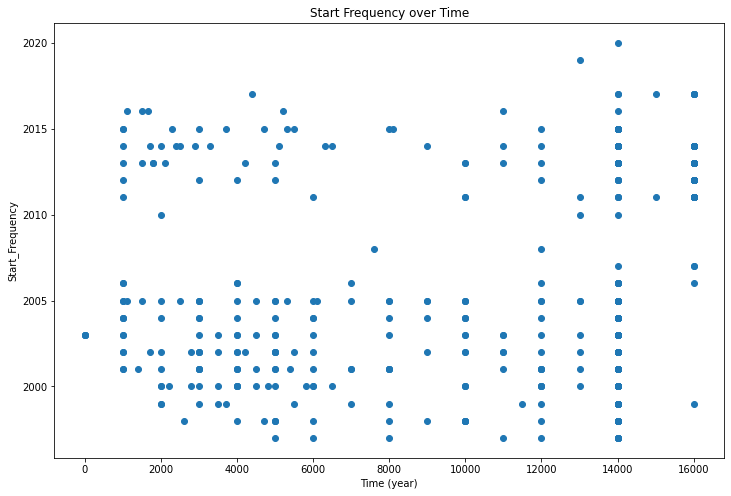

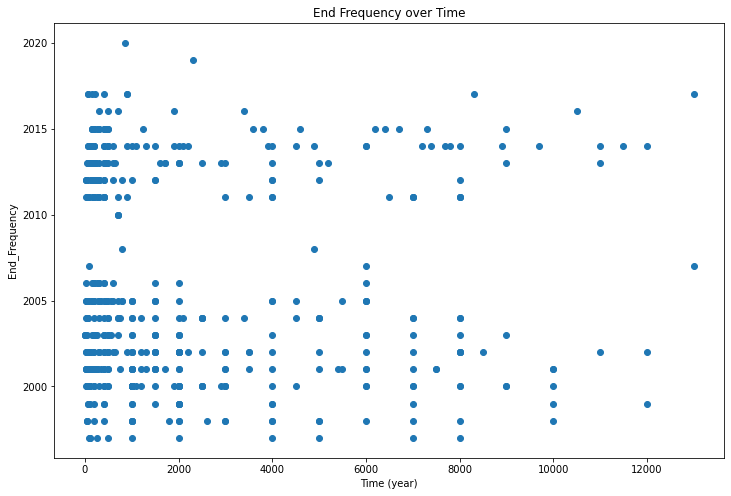

In [543]:
plt.figure(figsize = (12, 8))
plt.scatter(y_data, x_data)

plt.xlabel("Time (year)")
plt.ylabel("Start_Frequency")
plt.title("Start Frequency over Time")

y2_data = nasa_df['End_Frequency']
y2_data = y2_data.replace(np.nan, 0)
y2_data = y2_data.astype(int)
plt.figure(figsize = (12, 8))
plt.scatter(y2_data, x_data)

plt.xlabel("Time (year)")
plt.ylabel("End_Frequency")
plt.title("End Frequency over Time")

Text(0, 0.5, 'End_Frequency')

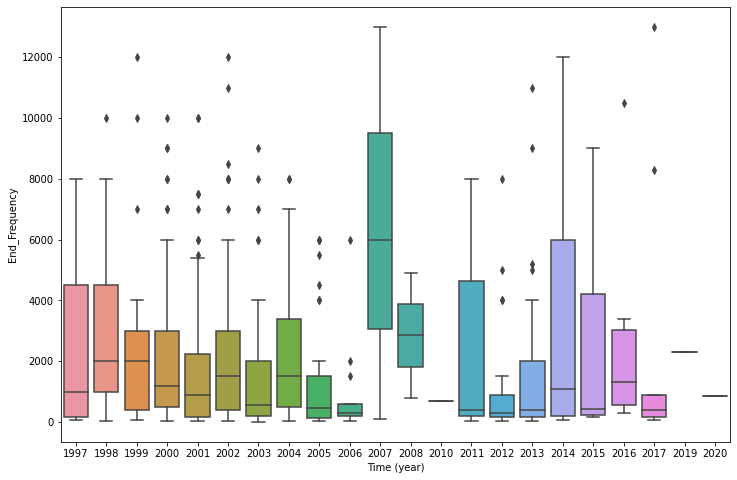

In [544]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = x_data , y = y2_data)
plt.xlabel("Time (year)")
plt.ylabel("End_Frequency")

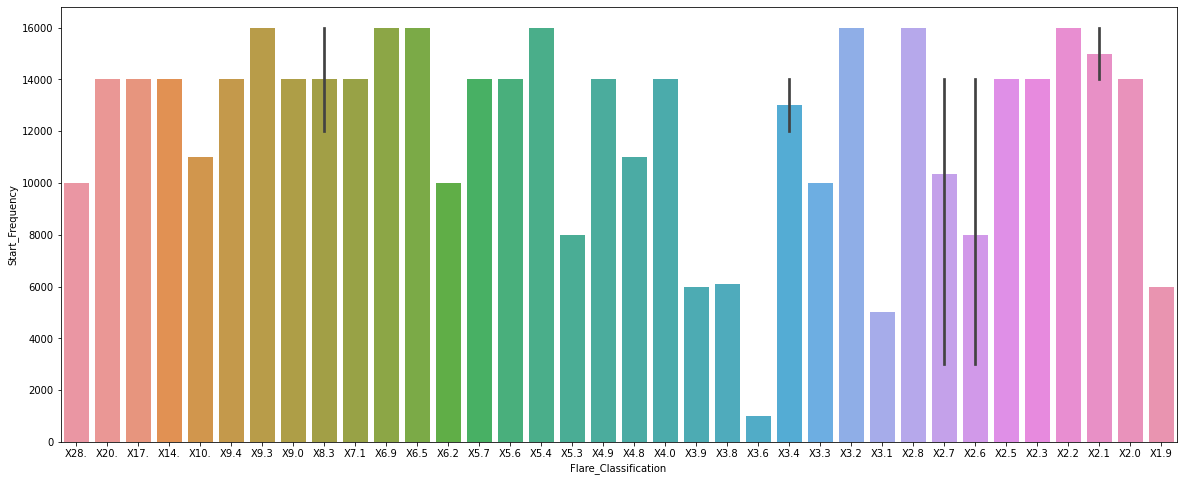

In [545]:
sf = df_50['Start_Frequency']
sf = sf.replace(np.nan, 0)
sf = sf.astype(int)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_50["Flare_Classification"], y=sf)

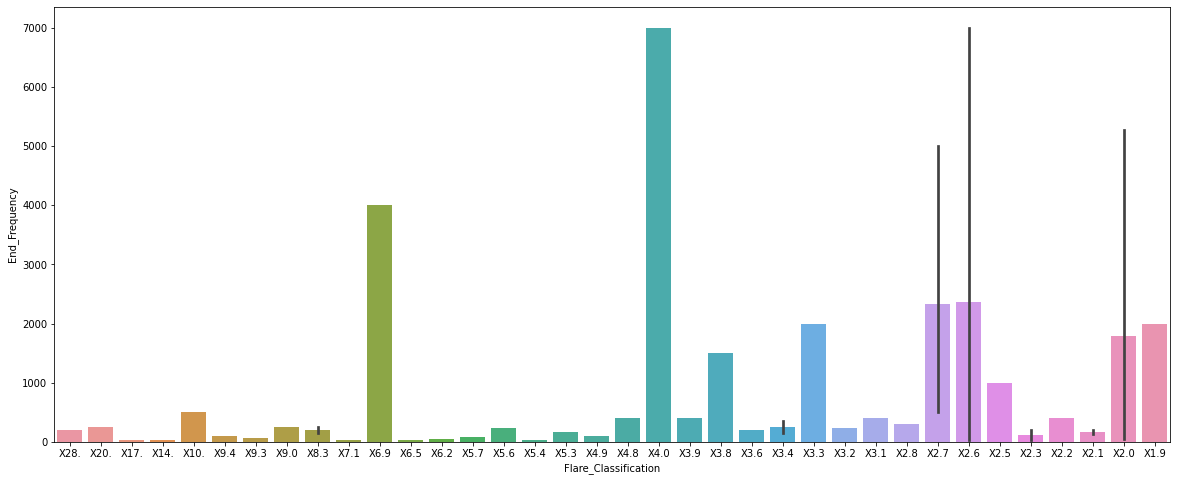

In [546]:
sf = df_50['End_Frequency']
sf = sf.replace(np.nan, 0)
sf = sf.astype(int)
plt.figure(figsize=(20, 8))
sns.barplot(x=df_50["Flare_Classification"], y=sf)